In [1]:
from dog import *
dog = Dog()

In [41]:
dog.status()

Motors:
LEG1_M0: 
Disabled
LEG1_M1: 
Disabled
LEG1_M2: 
Disabled
LEG2_M0: 
Disabled
LEG2_M1: 
Disabled
LEG2_M2: 
Disabled
LEG3_M0: 
Disabled
LEG3_M1: 
Disabled
LEG3_M2: 
Disabled
LEG4_M0: 
Disabled
LEG4_M1: 
Disabled
LEG4_M2: 
Disabled


{'motors': [{'LEG1_M0': {'state': 1,
    'error': 0,
    'motor_err': 0,
    'encoder_err': 0,
    'controller_err': 0,
    'control_mode': 0,
    'input_mode': 0,
    'update_rate': 0.835625171661377}},
  {'LEG1_M1': {'state': 1,
    'error': 0,
    'motor_err': 0,
    'encoder_err': 0,
    'controller_err': 0,
    'control_mode': 0,
    'input_mode': 0,
    'update_rate': 0.8334176540374756}},
  {'LEG1_M2': {'state': 1,
    'error': 0,
    'motor_err': 0,
    'encoder_err': 0,
    'controller_err': 0,
    'control_mode': 0,
    'input_mode': 0,
    'update_rate': 0.8384053707122803}},
  {'LEG2_M0': {'state': 1,
    'error': 0,
    'motor_err': 0,
    'encoder_err': 0,
    'controller_err': 0,
    'control_mode': 0,
    'input_mode': 0,
    'update_rate': 0.8350293636322021}},
  {'LEG2_M1': {'state': 1,
    'error': 0,
    'motor_err': 0,
    'encoder_err': 0,
    'controller_err': 0,
    'control_mode': 0,
    'input_mode': 0,
    'update_rate': 0.8358685970306396}},
  {'LEG2_M2': {'

In [2]:
dog.clear_errors()

In [7]:
dog.save_configuration()

In [48]:
dog.init()

In [10]:
dog.home()

In [49]:
dog.enable()

In [6]:
dog.disable()

In [2]:
dog.init_from_floor()

In [8]:
dog.rest()

### 电机参数设置

In [6]:
leg = dog.legs[3]
for i in range(3):
    motor = leg.motor(i)
    motor.set_controller_pid(100, 0.02, 0)
    motor.set_limits(40,10)
    motor.position_filter_mode(12)
    print(motor.get_controller_modes())
    print(motor.get_controller_pid())
    print(motor.get_limits())

[3, 3, 12.0]
(100.0, 0.0200042724609375, 0.0)
(40.0, 10.0)
[3, 3, 12.0]
(100.0, 0.0200042724609375, 0.0)
(40.0, 10.0)
[3, 3, 12.0]
(100.0, 0.0200042724609375, 0.0)
(40.0, 10.0)


In [10]:
print(dog.legs[0].motor(2).get_torque())
print(dog.legs[1].motor(2).get_torque())
print(dog.legs[2].motor(2).get_torque())
print(dog.legs[3].motor(2).get_torque())

0.5116194178933071
-0.5765869630226159
-0.26286210693766404
-0.22353964541202975


### 单腿正运动学实验

In [5]:
from ipywidgets import interact
@interact(id = [('leg0',0), ('leg1',1), ('leg2',2), ('leg3',3)], a1=(-30,30,0.5), a2=(-30,30,0.5), a3=(-30,30,0.5))
def leg_test(id, a1, a2, a3):
    dog.legs[id].set_motor_degrees(a1, a2, a3)

interactive(children=(Dropdown(description='id', options=(('leg0', 0), ('leg1', 1), ('leg2', 2), ('leg3', 3)),…

### 单腿逆运动学实验

In [9]:
from ipywidgets import interact
@interact(id = [('leg0',0), ('leg1',1), ('leg2',2), ('leg3',3)], mirror = False, x=(-30,30,0.5), y=(50,110,0.5), z=(200,300,0.5))
def leg_inv_test(id,mirror, x = 0, y = Leg.LEN_D, z = 240):
    dog.legs[id].inverse_kinemetics(x, y, z, mirror)

interactive(children=(Dropdown(description='id', options=(('leg0', 0), ('leg1', 1), ('leg2', 2), ('leg3', 3)),…

### 整机逆运动学实验

In [6]:
from ipywidgets import interact
from math import pi
@interact(dx=(-20,20,0.5), dy=(-30,30,0.5),dz=(-30,30,0.5),roll=(-20,20,0.5), pitch=(-10,10,0.5), yaw=(-15,15,0.5))
def pose_test(dx,dy,dz,roll, pitch, yaw):
    dog.body_pose(dx,dy,dz,roll/180.0*pi, pitch/180.0*pi, yaw/180.0*pi)

interactive(children=(FloatSlider(value=0.0, description='dx', max=20.0, min=-20.0, step=0.5), FloatSlider(val…

### 轨迹函数

In [7]:
from math import pi, copysign
def cycloid_swing(S, H, phase): # phase = t / SWING_T
    s = S * (phase - sin(2*pi*phase)/(2*pi))
    h = H * (2*phase-sin(4*pi*phase)/(2*pi)-1) * copysign(1, (0.5-phase)) + H
    return (s, h)
def cycloid_stance(S, phase): # phase = t / STANCE_T
    s = S * (1 - phase + sin(2*pi*phase)/(2*pi))
    h = 0
    return (s, h)
def linear_stance(S, phase): # phase = t / STANCE_T
    s = S *(1 - phase)
    h = 0
    return (s, h)

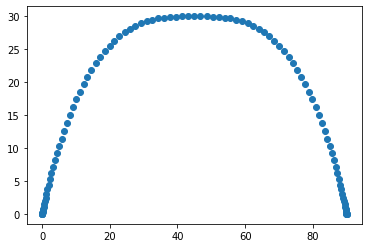

In [174]:
import matplotlib.pyplot as plt
s = []
h = []
for i in range(101):
    ts, th = cycloid_swing(90, 30, i/100.0)
#     ts,th = cycloid_stance(30, i/100.0)
#     ts,th = linear_stance(30, i/100.0)
    s.append(ts)
    h.append(th)
plt.plot(s,h, 'o')  # Plot some data on the axes.

In [70]:
dog.legs[0].inverse_kinemetics(0,0,260,True)
dog.legs[1].inverse_kinemetics(0,0,260,True)
dog.legs[2].inverse_kinemetics(0,0,260)
dog.legs[3].inverse_kinemetics(0,0,260)

In [71]:
dog.mirror()

In [69]:
from math import fmod
dog.filter_mode(20)
dog.delay(1)
def trot(S, H, T, duration = float('inf')):
#     x0 = 20
#     y0 = Leg.LEN_D
    x0 = -20
    y0 = 0
    z0 = 260
    t0 = dog.time()
    while True:
        if dog.time() - t0 > duration:
            break
        phase = fmod(dog.time()-t0, T) / T
        ds0 = 0
        dh0 = 0
        ds1 = 0
        dh1 = 0
        if phase < 0.5:
            ds0, dh0 = cycloid_stance(S, phase * 2)
            ds1, dh1 = cycloid_swing(S, H, phase * 2)
        else:
            ds0, dh0 = cycloid_swing(S, H, phase * 2 - 1)
            ds1, dh1 = cycloid_stance(S, phase * 2 - 1)
            
        if dog.time() - t0 >= T / 2:
            dog.legs[0].inverse_kinemetics(ds0 , y0, z0 - dh0, True)
            dog.legs[3].inverse_kinemetics(ds0, y0, z0 - dh0)

        dog.legs[1].inverse_kinemetics(ds1, y0, z0  - dh1, True)
        dog.legs[2].inverse_kinemetics(ds1, y0, z0 - dh1)
            
        dog.delay(0.05)
            
trot(0,50,0.55, 5.5)
trot(30, 50, 0.55)

KeyboardInterrupt: 

In [ ]:
from math import fmod
dog.filter_mode(20)
dog.delay(1)
def walk(S, H, T, duration = float('inf')):
#     x0 = 20
#     y0 = Leg.LEN_D
    x0 = -20
    y0 = 0
    z0 = 260
    t0 = dog.time()
    while True:
        if dog.time() - t0 > duration:
            break
        phase = fmod(dog.time()-t0, T) / T
        ds0 = 0
        dh0 = 0
        ds1 = 0
        dh1 = 0
        if phase < 0.5:
            ds0, dh0 = cycloid_stance(S, phase * 2)
            ds1, dh1 = cycloid_swing(S, H, phase * 2)
        else:
            ds0, dh0 = cycloid_swing(S, H, phase * 2 - 1)
            ds1, dh1 = cycloid_stance(S, phase * 2 - 1)
            
        if dog.time() - t0 >= T / 2:
            dog.legs[0].inverse_kinemetics(ds0 , y0, z0 - dh0, True)
            dog.legs[3].inverse_kinemetics(ds0, y0, z0 - dh0)

        dog.legs[1].inverse_kinemetics(ds1, y0, z0  - dh1, True)
        dog.legs[2].inverse_kinemetics(ds1, y0, z0 - dh1)
            
        dog.delay(0.05)
            
trot(0,50,0.55, 5.5)
trot(30, 50, 0.55)

In [9]:
dog.battery.get_voltage()

11.946374893188477

In [3]:
dog.battery.set_led(0, 5, [0,255,255])

True

In [12]:
dog.battery.get_gyro()

[1.5759735119540106, 0.004793689962142629, 3.1123511448207233]